# Helper

In [27]:
from datasets import load_dataset, concatenate_datasets
from datasets import DatasetDict
import matplotlib.pyplot as plt

In [3]:
def get_dataset(name: str) -> DatasetDict:
    dataset = load_dataset(
    name=name,
    path="DBD-research-group/BirdSet",
    cache_dir="../../data_birdset/" + name
    )
    return dataset

In [4]:
def cut_underscores(path: str, num: int) -> str:
    """
    cuts till 'num' underscores from end of 'path'
    """
    for i in range(num):
        path = path[:path.rfind("_")]
    return path

In [38]:
def get_unique_multilabel_labels(multilabel_labels: list) -> list:
    unique_labels = []
    for sample_labels in multilabel_labels:
        for label in sample_labels:
            if label not in unique_labels:
                unique_labels.append(label)
    return unique_labels

def count_multilabel_occurences(multilabel_labels: list) -> list:
    label_occurences = {}
    for sample_codes in multilabel_labels:
        for code in sample_codes:
            label_occurences[code] = label_occurences.get(code, 0) + 1
    return label_occurences

def get_multilabel_stats(multilabel_labels: list) -> tuple[list, dict]:
    unique_labels = []
    label_occurences = {}
    for sample_labels in multilabel_labels:
        for label in sample_labels:
            if label not in unique_labels:
                unique_labels.append(label)
            label_occurences[label] = label_occurences.get(label, 0) + 1
    return unique_labels, label_occurences

def show_multilabel_stats(dataset_dict: DatasetDict, figwidth: int):
    train_set = dataset_dict["train"]
    test_set = dataset_dict["test"]

    unique_train_labels, train_label_occurences = get_multilabel_stats(train_set["ebird_code_multilabel"])
    unique_test_labels, test_label_occurences = get_multilabel_stats(test_set["ebird_code_multilabel"])

    unique_labels_in_dataset = set(unique_train_labels).union(set(unique_test_labels))

    for label in unique_labels_in_dataset:
        # fill missing labels with occurence count of 0
        train_label_occurences[label] = train_label_occurences.get(label, 0)
        test_label_occurences[label] = test_label_occurences.get(label, 0)

    print(f"Unique labels in dataset: {len(unique_labels_in_dataset)}")
    print(f"Unique labels in train set vs. test set:  {len(unique_train_labels)} vs. {len(unique_test_labels)}")

    label_occurences = sorted(train_label_occurences.items())
    labels, train_label_counts = zip(*label_occurences)
    label_occurences = sorted(test_label_occurences.items())
    labels, test_label_counts = zip(*label_occurences)

    fig, ax = plt.subplots()
    fig.set_figwidth(figwidth)
    width = 0.8

    ax.set_xticks(labels, labels=labels)

    ax.bar(labels, train_label_counts, label="train_set", width=width)
    ax.bar(labels, test_label_counts, label="test_set",width=width, bottom=train_label_counts)
    ax.set_xlabel("Bird Code")
    ax.set_ylabel("Occurence count")
    ax.legend()
    plt.show()

# NES

In [6]:
dataset = get_dataset("NES_scape")
test_5s = dataset["test_5s"]
print(dataset)
next(iter(test_5s))

c:\Users\feier\miniconda3\envs\birdset\lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 6952
    })
    test_5s: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 24480
    })
})


{'audio': {'bytes': None,
  'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NES_scape\\downloads\\extracted\\35644542a0998491c586fd647ca3e015195cd45c9d8ca749e7fc4dbb61bd5e79\\NES_001_S01_20190914_043000_000_005.ogg'},
 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NES_scape\\downloads\\extracted\\35644542a0998491c586fd647ca3e015195cd45c9d8ca749e7fc4dbb61bd5e79\\NES_001_S01_20190914_043000_000_005.ogg',
 'start_time': 0.0,
 'end_time': 5.0,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [],
 'ebird_code_secondary': None,
 'call_type': None,
 'sex': None,
 'lat': 5.59,
 'long': -75.85,
 'length': None,
 'microphone': 'Soundscape',
 'license': 'Creative Commons Attribution 4.0 International Public License',
 'source': 'https://zenodo.org/record/7525349',
 'local_time': '4:30:29',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None}

## Split Test_5s by split percentage

In [7]:
def get_file_comparison_name(path :str) -> str:
    path = cut_underscores(path, 2)
    return path

num_rows = len(test_5s)
print(f"dataset length: {num_rows}\n")
desired_train_split = 0.2
desired_train_split_idx = int(num_rows * (1 - desired_train_split))

filepath : str = test_5s[desired_train_split_idx]["filepath"]
split_file = get_file_comparison_name(filepath)

# since split shouldn't cut files in two find nearest index that's a different file
bottom_idx = 0
top_idx = num_rows-1

for idx in range(desired_train_split_idx-1, -1, -1):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        bottom_idx = idx
        break

for idx in range(desired_train_split_idx, num_rows):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        top_idx = idx
        break


bottom_train_split = 1- (bottom_idx / num_rows)
top_train_split = 1 - (top_idx / num_rows)
print(f"bottom split idx: {bottom_idx} \ndata at idx: {test_5s[bottom_idx]}\n")
print(f"top split idx: {top_idx} \ndata at idx: {test_5s[top_idx]}\n")
print(f"bottom split percentage: {bottom_train_split} \ntop split percentage: {top_train_split}\n")

# select nearest to desired split
if bottom_train_split - desired_train_split > desired_train_split - top_train_split:
    nearest_split_idx = top_idx
else:
    nearest_split_idx = bottom_idx

train_split = test_5s.select(range(nearest_split_idx+1))
test_split = test_5s.select(range(nearest_split_idx+1, num_rows))

print("train dataset:\n" ,train_split, train_split[-1])
print("test dataset:\n", test_split, test_split[0])

nes_p_test_5s_dataset_dict = DatasetDict({'train':train_split, 'test':test_split})
nes_p_test_5s_dataset_dict

dataset length: 24480

bottom split idx: 19439 
data at idx: {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NES_scape\\downloads\\extracted\\35644542a0998491c586fd647ca3e015195cd45c9d8ca749e7fc4dbb61bd5e79\\NES_027_S02_20190923_180001_3595_3600.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NES_scape\\downloads\\extracted\\35644542a0998491c586fd647ca3e015195cd45c9d8ca749e7fc4dbb61bd5e79\\NES_027_S02_20190923_180001_3595_3600.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [], 'ebird_code_secondary': None, 'call_type': None, 'sex': None, 'lat': 10.11, 'long': -84.52, 'length': None, 'microphone': 'Soundscape', 'license': 'Creative Commons Attribution 4.0 International Public License', 'source': 'https://zenodo.org/record/7525349', 'local_time': '19:43:25', 'detected_events': None, 'event_cluster': None, 'peaks': None, 'quality': None, 'recordist': None}

top spl

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 19440
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 5040
    })
})

In [8]:
#nes_p_test_5s_dataset_dict.push_to_hub(repo_id="DBD-research-group/soundscape_datasets", data_dir="NES20")

Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/9720 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/98 [00:00<?, ?ba/s]

Map:   0%|          | 0/9720 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/98 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/5040 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/51 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/5.57k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/DBD-research-group/soundscape_datasets/commit/e269b82a56a57d51aebc9f4e74fa94eddb80fafa', commit_message='Upload dataset', commit_description='', oid='e269b82a56a57d51aebc9f4e74fa94eddb80fafa', pr_url=None, pr_revision=None, pr_num=None)

### Stats

Unique labels in dataset: 88
Unique labels in train set vs. test set:  80 vs. 45


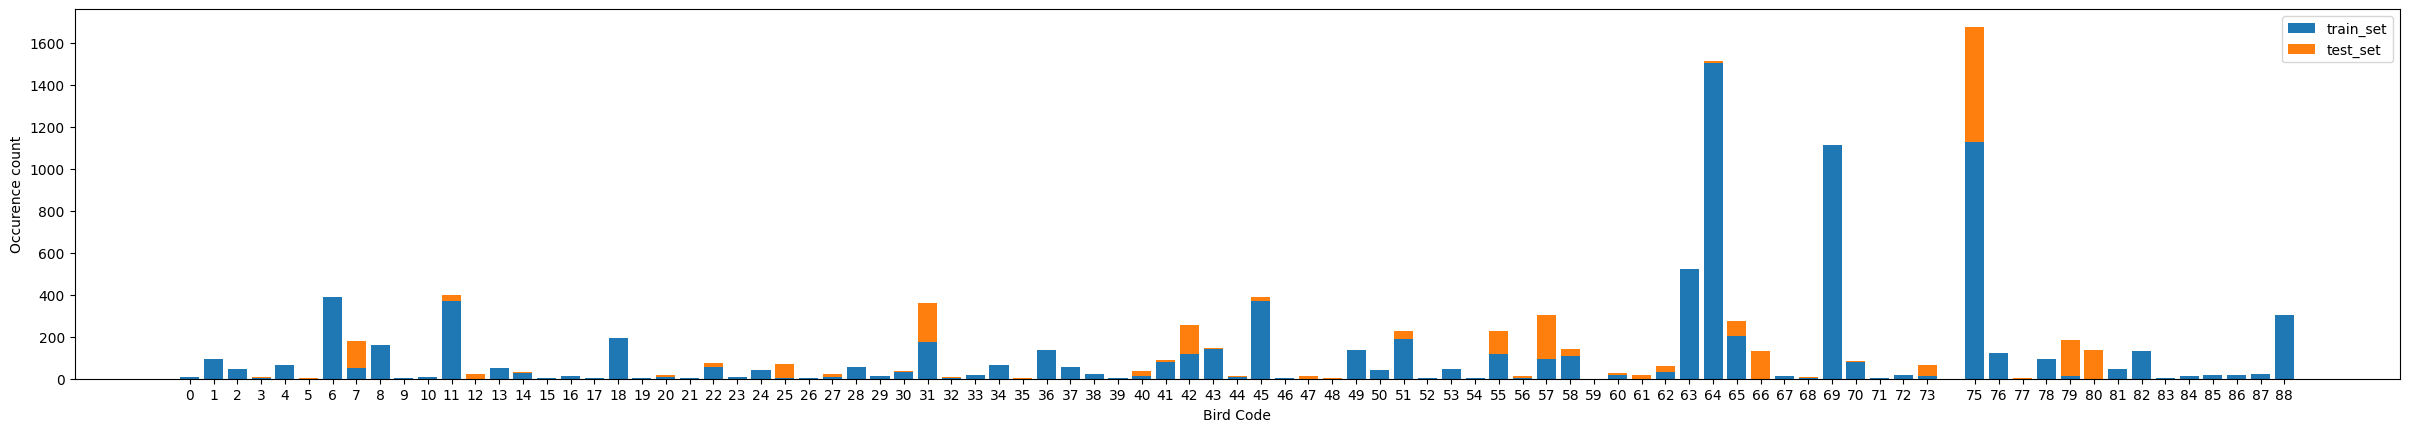

In [40]:
show_multilabel_stats(nes_p_test_5s_dataset_dict, figwidth=30)

## Split Test_5s by last two days

In [4]:
num_rows = len(test_5s)

filepath_at_idx = test_5s[num_rows-1]["filepath"]
filepath_at_idx = cut_underscores(filepath_at_idx, 3)
last_day = filepath_at_idx[-8:]
day_count = 0
split_idx = 0
# since split shouldn't cut files find index of the last two days
for idx in range(num_rows-1, -1, -1):
    filepath_at_idx = test_5s[idx]["filepath"]
    filepath_at_idx = cut_underscores(filepath_at_idx, 3)
    day_at_idx = filepath_at_idx[-8:]

    if last_day != day_at_idx:
        day_count += 1
        last_day = day_at_idx

        if day_count >= 2:
            split_idx = idx
            break


print(split_idx, last_day)

train_split = test_5s.select(range(split_idx+1))
test_split = test_5s.select(range(split_idx+1, num_rows))

print(train_split, train_split[-1])
print(test_split, test_split[0])

nes_d_test_5s_dataset_dict = DatasetDict({'train':train_split, 'test':test_split})
nes_d_test_5s_dataset_dict

19439 20190923
Dataset({
    features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
    num_rows: 19440
}) {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NES_scape\\downloads\\extracted\\35644542a0998491c586fd647ca3e015195cd45c9d8ca749e7fc4dbb61bd5e79\\NES_027_S02_20190923_180001_3595_3600.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NES_scape\\downloads\\extracted\\35644542a0998491c586fd647ca3e015195cd45c9d8ca749e7fc4dbb61bd5e79\\NES_027_S02_20190923_180001_3595_3600.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [], 'ebird_code_secondary': None, 'call_type': None, 'sex': None, 'lat': 10.11, 'long': -84.52,

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 19440
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 5040
    })
})

# HSN

In [49]:
dataset = get_dataset("HSN_scape")
test_5s = dataset["test_5s"]
print(dataset)
next(iter(test_5s))

DatasetDict({
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 10296
    })
    test_5s: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 12000
    })
})


{'audio': {'bytes': None,
  'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\HSN_scape\\downloads\\extracted\\2fb6f48b55ef82b53f61a9930b5aaeed4e5b543e15b496539d6c6cc1737442a1\\HSN_001_20150708_061805_000_005.ogg'},
 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\HSN_scape\\downloads\\extracted\\2fb6f48b55ef82b53f61a9930b5aaeed4e5b543e15b496539d6c6cc1737442a1\\HSN_001_20150708_061805_000_005.ogg',
 'start_time': 0.0,
 'end_time': 5.0,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [0],
 'ebird_code_secondary': None,
 'call_type': None,
 'sex': None,
 'lat': 37.0,
 'long': -118.5,
 'length': None,
 'microphone': 'Soundscape',
 'license': 'Creative Commons Attribution 4.0 International Public License',
 'source': 'https://zenodo.org/record/7525805',
 'local_time': '6:18:08',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None}

## Split by percentage

In [50]:
def get_file_comparison_name(path :str) -> str:
    path = cut_underscores(path, 2)
    return path

num_rows = len(test_5s)
print(f"dataset length: {num_rows}\n")
desired_train_split = 0.2
desired_train_split_idx = int(num_rows * (1 - desired_train_split))

filepath : str = test_5s[desired_train_split_idx]["filepath"]
split_file = get_file_comparison_name(filepath)

# since split shouldn't cut files in two find nearest index that's a different file
bottom_idx = 0
top_idx = num_rows-1

for idx in range(desired_train_split_idx-1, -1, -1):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        bottom_idx = idx
        break

for idx in range(desired_train_split_idx, num_rows):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        top_idx = idx
        break


bottom_train_split = 1- (bottom_idx / num_rows)
top_train_split = 1 - (top_idx / num_rows)
print(f"bottom split idx: {bottom_idx} \ndata at idx: {test_5s[bottom_idx]}\n")
print(f"top split idx: {top_idx} \ndata at idx: {test_5s[top_idx]}\n")
print(f"bottom split percentage: {bottom_train_split} \ntop split percentage: {top_train_split}\n")

# select nearest to desired split
if bottom_train_split - desired_train_split > desired_train_split - top_train_split:
    nearest_split_idx = top_idx
else:
    nearest_split_idx = bottom_idx

train_split = test_5s.select(range(nearest_split_idx+1))
test_split = test_5s.select(range(nearest_split_idx+1, num_rows))

print("train dataset:\n" ,train_split, train_split[-1])
print("test dataset:\n", test_split, test_split[0])

hsn_p_test_5s_dataset_dict = DatasetDict({'train':train_split, 'test':test_split})
hsn_p_test_5s_dataset_dict

dataset length: 12000

bottom split idx: 9599 
data at idx: {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\HSN_scape\\downloads\\extracted\\2fb6f48b55ef82b53f61a9930b5aaeed4e5b543e15b496539d6c6cc1737442a1\\HSN_080_20150712_070105_595_600.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\HSN_scape\\downloads\\extracted\\2fb6f48b55ef82b53f61a9930b5aaeed4e5b543e15b496539d6c6cc1737442a1\\HSN_080_20150712_070105_595_600.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [], 'ebird_code_secondary': None, 'call_type': None, 'sex': None, 'lat': 37.0, 'long': -118.5, 'length': None, 'microphone': 'Soundscape', 'license': 'Creative Commons Attribution 4.0 International Public License', 'source': 'https://zenodo.org/record/7525805', 'local_time': '7:14:17', 'detected_events': None, 'event_cluster': None, 'peaks': None, 'quality': None, 'recordist': None}

top split idx: 9720 
d

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 9600
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 2400
    })
})

In [19]:
#hsn_p_test_5s_dataset_dict.push_to_hub(repo_id="DBD-research-group/soundscape_datasets", data_dir="HSN20p")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/9600 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/96 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2400 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/24 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/2.36k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/DBD-research-group/soundscape_datasets/commit/97f15ddf02630bc5be2221e54bfb628b9cc694ce', commit_message='Upload dataset', commit_description='', oid='97f15ddf02630bc5be2221e54bfb628b9cc694ce', pr_url=None, pr_revision=None, pr_num=None)

## Split by days

In [17]:
num_rows = len(test_5s)

filepath_at_idx = test_5s[num_rows-1]["filepath"]
filepath_at_idx = cut_underscores(filepath_at_idx, 3)
last_day = filepath_at_idx[-8:]
day_count = 0
split_idx = 0
# since split shouldn't cut files find index of the last two days
for idx in range(num_rows-1, -1, -1):
    filepath_at_idx = test_5s[idx]["filepath"]
    filepath_at_idx = cut_underscores(filepath_at_idx, 3)
    day_at_idx = filepath_at_idx[-8:]

    if last_day != day_at_idx:
        day_count += 1
        last_day = day_at_idx

        if day_count >= 1:
            split_idx = idx
            break


print(split_idx, last_day)

train_split = test_5s.select(range(split_idx+1))
test_split = test_5s.select(range(split_idx+1, num_rows))
print(f"test percentage: {len(test_split)/num_rows}")

print(train_split, train_split[-1])
print(test_split, test_split[0])

hsn_d_test_5s_dataset_dict = DatasetDict({'train':train_split, 'test':test_split})
hsn_d_test_5s_dataset_dict

8879 20150711
test percentage: 0.26
Dataset({
    features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
    num_rows: 8880
}) {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\HSN_scape\\downloads\\extracted\\2fb6f48b55ef82b53f61a9930b5aaeed4e5b543e15b496539d6c6cc1737442a1\\HSN_074_20150711_090105_595_600.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\HSN_scape\\downloads\\extracted\\2fb6f48b55ef82b53f61a9930b5aaeed4e5b543e15b496539d6c6cc1737442a1\\HSN_074_20150711_090105_595_600.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [], 'ebird_code_secondary': None, 'call_type': None, 'sex': None, 'lat': 37.0, 'long': 

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 8880
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 3120
    })
})

In [21]:
#hsn_d_test_5s_dataset_dict.push_to_hub(repo_id="DBD-research-group/soundscape_datasets", data_dir="HSN1d")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/8880 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/89 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/3120 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/32 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/DBD-research-group/soundscape_datasets/commit/f57db9178e1f994300dc94af36bc0d00ea0a55a7', commit_message='Upload dataset', commit_description='', oid='f57db9178e1f994300dc94af36bc0d00ea0a55a7', pr_url=None, pr_revision=None, pr_num=None)

# PER

In [18]:
dataset = get_dataset("PER_scape")
test_5s = dataset["test_5s"]
print(dataset)
next(iter(test_5s))

c:\Users\feier\miniconda3\envs\birdset\lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 14798
    })
    test_5s: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 15120
    })
})


{'audio': {'bytes': None,
  'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\PER_scape\\downloads\\extracted\\b24997398af0755440a33aea225001367c06bf4d223d29e4eaad2901780706f4\\PER_001_S01_20190116_100007Z_000_005.ogg'},
 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\PER_scape\\downloads\\extracted\\b24997398af0755440a33aea225001367c06bf4d223d29e4eaad2901780706f4\\PER_001_S01_20190116_100007Z_000_005.ogg',
 'start_time': 0.0,
 'end_time': 5.0,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [],
 'ebird_code_secondary': None,
 'call_type': None,
 'sex': None,
 'lat': -12.542578,
 'long': -69.06205,
 'length': None,
 'microphone': 'Soundscape',
 'license': 'Creative Commons Attribution 4.0 International Public License',
 'source': 'https://zenodo.org/record/7079124',
 'local_time': '10:09:06',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None}

## Split by days

Splitting by percentage doesn't really make sense here because of the 7 different sites.

In [19]:
num_rows = len(test_5s)

filepath_at_idx = test_5s[num_rows-1]["filepath"]
filepath_at_idx = cut_underscores(filepath_at_idx, 3)
last_day = filepath_at_idx[-8:]
day_count = 0
split_idx = 0
# since split shouldn't cut files find index of the last two days
for idx in range(num_rows-1, -1, -1):
    filepath_at_idx = test_5s[idx]["filepath"]
    filepath_at_idx = cut_underscores(filepath_at_idx, 3)
    day_at_idx = filepath_at_idx[-8:]

    if last_day != day_at_idx:
        day_count += 1
        last_day = day_at_idx

        if day_count >= 1:
            split_idx = idx
            break


print(split_idx, last_day)

train_split = test_5s.select(range(split_idx+1))
test_split = test_5s.select(range(split_idx+1, num_rows))
print(f"test percentage: {len(test_split)/num_rows}")

print(train_split, train_split[-1])
print(test_split, test_split[0])

per_test_5s_dataset_dict = DatasetDict({'train':train_split, 'test':test_split})
per_test_5s_dataset_dict

10079 20190120
test percentage: 0.3333333333333333
Dataset({
    features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
    num_rows: 10080
}) {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\PER_scape\\downloads\\extracted\\b24997398af0755440a33aea225001367c06bf4d223d29e4eaad2901780706f4\\PER_014_S10_20190120_100007Z_3595_3600.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\PER_scape\\downloads\\extracted\\b24997398af0755440a33aea225001367c06bf4d223d29e4eaad2901780706f4\\PER_014_S10_20190120_100007Z_3595_3600.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [18, 121, 85, 116], 'ebird_code_secondary': None, 'call_t

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 10080
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 5040
    })
})

In [27]:
#per_test_5s_dataset_dict.push_to_hub(repo_id="DBD-research-group/soundscape_datasets", data_dir="PER1d")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/10080 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/101 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/5040 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/51 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/DBD-research-group/soundscape_datasets/commit/715d1518b6c72959fe397725c698486a896cbe38', commit_message='Upload dataset', commit_description='', oid='715d1518b6c72959fe397725c698486a896cbe38', pr_url=None, pr_revision=None, pr_num=None)

# POW

In [51]:
dataset = get_dataset("POW_scape")
test_5s = dataset["test_5s"]
print(dataset)
next(iter(test_5s))

c:\Users\feier\miniconda3\envs\birdset\lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 16052
    })
    test_5s: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 4560
    })
})


{'audio': {'bytes': None,
  'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\POW_scape\\downloads\\extracted\\1d1d71a319ec3ba6a0ac229cb24efaf5f9180f58e9fdc408e5e4959dc9d02bc0\\Recording_1_Segment_03_000_005.ogg'},
 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\POW_scape\\downloads\\extracted\\1d1d71a319ec3ba6a0ac229cb24efaf5f9180f58e9fdc408e5e4959dc9d02bc0\\Recording_1_Segment_03_000_005.ogg',
 'start_time': 0.0,
 'end_time': 5.0,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [],
 'ebird_code_secondary': None,
 'call_type': None,
 'sex': None,
 'lat': 40.1602,
 'long': -79.2719,
 'length': None,
 'microphone': 'Soundscape (AudioMoths)',
 'license': 'Creative Commons Zero v1.0 Universal',
 'source': 'https://zenodo.org/record/4656848',
 'local_time': '5:47:07',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None}

## Split by percentage

In [52]:
def get_file_comparison_name(path :str) -> str:
    path = cut_underscores(path, 4)
    return path


num_rows = len(test_5s)
print(f"dataset length: {num_rows}\n")
desired_train_split = 0.2
desired_train_split_idx = int(num_rows * (1 - desired_train_split))

filepath : str = test_5s[desired_train_split_idx]["filepath"]
split_file = get_file_comparison_name(filepath)

# since split shouldn't cut files in two find nearest index that's a different file
bottom_idx = 0
top_idx = num_rows-1

for idx in range(desired_train_split_idx-1, -1, -1):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        bottom_idx = idx
        break

for idx in range(desired_train_split_idx, num_rows):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        top_idx = idx
        break

bottom_train_split = 1- (bottom_idx / num_rows)
top_train_split = 1 - (top_idx / num_rows)
print(f"bottom split idx: {bottom_idx} \ndata at idx: {test_5s[bottom_idx]}\n")
print(f"top split idx: {top_idx} \ndata at idx: {test_5s[top_idx]}\n")
print(f"bottom split percentage: {bottom_train_split} \ntop split percentage: {top_train_split}\n")

# select nearest to desired split
if bottom_train_split - desired_train_split > desired_train_split - top_train_split:
    nearest_split_idx = top_idx
else:
    nearest_split_idx = bottom_idx

train_split = test_5s.select(range(nearest_split_idx+1))
test_split = test_5s.select(range(nearest_split_idx+1, num_rows))

print(train_split, train_split[-1])
print(test_split, test_split[0])

pow_p_test_5s_dataset_dict = DatasetDict({'train':train_split, 'test':test_split})
pow_p_test_5s_dataset_dict

dataset length: 4560

bottom split idx: 2999 
data at idx: {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\POW_scape\\downloads\\extracted\\1d1d71a319ec3ba6a0ac229cb24efaf5f9180f58e9fdc408e5e4959dc9d02bc0\\Recording_3_Segment_01_295_300.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\POW_scape\\downloads\\extracted\\1d1d71a319ec3ba6a0ac229cb24efaf5f9180f58e9fdc408e5e4959dc9d02bc0\\Recording_3_Segment_01_295_300.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [26, 32, 18], 'ebird_code_secondary': None, 'call_type': None, 'sex': None, 'lat': 40.1602, 'long': -79.2719, 'length': None, 'microphone': 'Soundscape (AudioMoths)', 'license': 'Creative Commons Zero v1.0 Universal', 'source': 'https://zenodo.org/record/4656848', 'local_time': '5:26:55', 'detected_events': None, 'event_cluster': None, 'peaks': None, 'quality': None, 'recordist': None}

top split idx: 4559 
d

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 1560
    })
})

In [33]:
#pow_p_test_5s_dataset_dict.push_to_hub(repo_id="DBD-research-group/soundscape_datasets", data_dir="POW34p")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1560 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/16 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/DBD-research-group/soundscape_datasets/commit/3063220faaca003cabf61f649c3570eab565abaf', commit_message='Upload dataset', commit_description='', oid='3063220faaca003cabf61f649c3570eab565abaf', pr_url=None, pr_revision=None, pr_num=None)

# SSW

In [22]:
dataset = get_dataset("SSW_scape")
test_5s = dataset["test_5s"]
print(dataset)
next(iter(test_5s))

c:\Users\feier\miniconda3\envs\birdset\lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 50760
    })
    test_5s: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 205200
    })
})


{'audio': {'bytes': None,
  'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\SSW_scape\\downloads\\extracted\\82dfa80c49868e320011d59caa144751c69b75fc5e906d0f95b0d456ea2692c0\\SSW_001_20170225_010000Z_000_005.ogg'},
 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\SSW_scape\\downloads\\extracted\\82dfa80c49868e320011d59caa144751c69b75fc5e906d0f95b0d456ea2692c0\\SSW_001_20170225_010000Z_000_005.ogg',
 'start_time': 0.0,
 'end_time': 5.0,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [],
 'ebird_code_secondary': None,
 'call_type': None,
 'sex': None,
 'lat': 42.4768,
 'long': -76.4527,
 'length': None,
 'microphone': 'Soundscape',
 'license': 'Creative Commons Attribution 4.0 International Public License',
 'source': 'https://zenodo.org/record/7079380',
 'local_time': '1:00:47',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None}

## Split by percentage

In [24]:
def get_file_comparison_name(path :str) -> str:
    path = cut_underscores(path, 3)
    path = path[-16:]
    return path

num_rows = len(test_5s)
print(f"dataset length: {num_rows}\n")
desired_train_split = 0.2
desired_train_split_idx = int(num_rows * (1 - desired_train_split))

filepath : str = test_5s[desired_train_split_idx]["filepath"]
split_file = get_file_comparison_name(filepath)
print(split_file)

# since split shouldn't cut files in two find nearest index that's a different file
bottom_idx = 0
top_idx = num_rows-1

for idx in range(desired_train_split_idx-1, -1, -1):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        bottom_idx = idx
        break

for idx in range(desired_train_split_idx, num_rows):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        top_idx = idx
        break

bottom_train_split = 1- (bottom_idx / num_rows)
top_train_split = 1 - (top_idx / num_rows)
print(f"bottom split idx: {bottom_idx} \ndata at idx: {test_5s[bottom_idx]}\n")
print(f"top split idx: {top_idx} \ndata at idx: {test_5s[top_idx]}\n")
print(f"bottom split percentage: {bottom_train_split} \ntop split percentage: {top_train_split}\n")

# select nearest to desired split
if bottom_train_split - desired_train_split > desired_train_split - top_train_split:
    nearest_split_idx = top_idx
else:
    nearest_split_idx = bottom_idx

train_split = test_5s.select(range(nearest_split_idx+1))
test_split = test_5s.select(range(nearest_split_idx+1, num_rows))

print(train_split, train_split[-1])
print(test_split, test_split[0])

ssw_p_test_5s_dataset_dict = DatasetDict({'train':train_split, 'test':test_split})
ssw_p_test_5s_dataset_dict

dataset length: 205200

SSW_229_20170701
bottom split idx: 164159 
data at idx: {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\SSW_scape\\downloads\\extracted\\7259b15a68bdee948e41762888844a7e8b2f91e1c653c8d095b6c3fcce106894\\SSW_228_20170701_210014Z_3595_3600.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\SSW_scape\\downloads\\extracted\\7259b15a68bdee948e41762888844a7e8b2f91e1c653c8d095b6c3fcce106894\\SSW_228_20170701_210014Z_3595_3600.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [46], 'ebird_code_secondary': None, 'call_type': None, 'sex': None, 'lat': 42.4768, 'long': -76.4527, 'length': None, 'microphone': 'Soundscape', 'license': 'Creative Commons Attribution 4.0 International Public License', 'source': 'https://zenodo.org/record/7079380', 'local_time': '22:00:09', 'detected_events': None, 'event_cluster': None, 'peaks': None, 'quality': None, 'recordi

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 164160
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 41040
    })
})

In [4]:
#ssw_p_test_5s_dataset_dict.push_to_hub(repo_id="DBD-research-group/soundscape_datasets", data_dir="SSW20p")

Uploading the dataset shards:   0%|          | 0/14 [00:00<?, ?it/s]

Map:   0%|          | 0/11726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11726 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11725 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11725 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11725 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Map:   0%|          | 0/11725 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ?it/s]

Map:   0%|          | 0/10260 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/103 [00:00<?, ?ba/s]

Map:   0%|          | 0/10260 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/103 [00:00<?, ?ba/s]

Map:   0%|          | 0/10260 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/103 [00:00<?, ?ba/s]

Map:   0%|          | 0/10260 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/103 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/DBD-research-group/soundscape_datasets/commit/a4573ee638aba2f9fca8cf899ef23d632d712745', commit_message='Upload dataset', commit_description='', oid='a4573ee638aba2f9fca8cf899ef23d632d712745', pr_url=None, pr_revision=None, pr_num=None)

## Split by days

In [5]:
num_rows = len(test_5s)

filepath_at_idx = test_5s[num_rows-1]["filepath"]
filepath_at_idx = filepath_at_idx[:filepath_at_idx.rfind("_")]
filepath_at_idx = filepath_at_idx[:filepath_at_idx.rfind("_")]
filepath_at_idx = filepath_at_idx[:filepath_at_idx.rfind("_")]
last_day = filepath_at_idx[-8:]
day_count = 0
split_idx = 0
# since split shouldn't cut files find index of the last two days
for idx in range(num_rows-1, -1, -1):
    filepath_at_idx = test_5s[idx]["filepath"]
    filepath_at_idx = filepath_at_idx[:filepath_at_idx.rfind("_")]
    filepath_at_idx = filepath_at_idx[:filepath_at_idx.rfind("_")]
    filepath_at_idx = filepath_at_idx[:filepath_at_idx.rfind("_")]
    day_at_idx = filepath_at_idx[-8:]

    if last_day != day_at_idx:
        day_count += 1
        last_day = day_at_idx

        if day_count >= 2:
            split_idx = idx
            break


print(split_idx, last_day)

train_split = test_5s.select(range(split_idx+1))
test_split = test_5s.select(range(split_idx+1, num_rows))
print(f"test percentage: {len(test_split)/num_rows}")

print(train_split, train_split[-1])
print(test_split, test_split[0])

ssw_d_test_5s_dataset_dict = DatasetDict({'train':train_split, 'test':test_split})
ssw_d_test_5s_dataset_dict

190799 20170805
test percentage: 0.07017543859649122
Dataset({
    features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
    num_rows: 190800
}) {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\SSW_scape\\downloads\\extracted\\7259b15a68bdee948e41762888844a7e8b2f91e1c653c8d095b6c3fcce106894\\SSW_265_20170805_200016Z_3595_3600.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\SSW_scape\\downloads\\extracted\\7259b15a68bdee948e41762888844a7e8b2f91e1c653c8d095b6c3fcce106894\\SSW_265_20170805_200016Z_3595_3600.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [], 'ebird_code_secondary': None, 'call_type': None, 'sex': No

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 190800
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 14400
    })
})

# UHH

In [31]:
dataset = get_dataset("UHH_scape")
test_5s = dataset["test_5s"]
print(dataset)
next(iter(test_5s))

c:\Users\feier\miniconda3\envs\birdset\lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 59583
    })
    test_5s: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 36637
    })
})


{'audio': {'bytes': None,
  'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\UHH_scape\\downloads\\extracted\\a39fd4590182df6876811d8e287d9479e4bec4a72763eac481048068f2595c09\\UHH_001_S01_20161121_150000_000_005.ogg'},
 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\UHH_scape\\downloads\\extracted\\a39fd4590182df6876811d8e287d9479e4bec4a72763eac481048068f2595c09\\UHH_001_S01_20161121_150000_000_005.ogg',
 'start_time': 0.0,
 'end_time': 5.0,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [],
 'ebird_code_secondary': None,
 'call_type': None,
 'sex': None,
 'lat': 19.801668,
 'long': -155.609444,
 'length': None,
 'microphone': 'Soundscape',
 'license': 'Creative Commons Attribution 4.0 International Public License',
 'source': 'https://zenodo.org/record/7078499',
 'local_time': '15:00:06',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None}

## Split in sites

In [36]:
sites = {}


site = test_5s["filepath"][0][:test_5s["filepath"][0].rfind("_")]
site = cut_underscores(site, 3)
last_site = site[-3:]
last_split_idx = 0
print(last_site)

all_files = test_5s["filepath"]
for idx in range(len(all_files)):
    site = all_files[idx][:all_files[idx].rfind("_")]
    site = cut_underscores(site, 3)
    site = site[-3:]

    if site != last_site:
        sites[last_site] = test_5s.select(range(last_split_idx, idx))
        last_split_idx = idx
        last_site = site

sites[last_site] = test_5s.select(range(last_split_idx, idx))

print(len(sites))
sites

S01
4


{'S01': Dataset({
     features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
     num_rows: 24900
 }),
 'S03': Dataset({
     features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
     num_rows: 732
 }),
 'S04': Dataset({
     features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'e

## Split by percentage

In [42]:
def get_file_comparison_name(path :str) -> str:
    path = cut_underscores(path, 3)
    path = path[-8:]
    return path

desired_train_split = 0.2

sites_split = {}
sites_split["train"] = []
sites_split["test"] = []

for site in sites.keys():
    site_dataset = sites[site]
    num_rows = len(site_dataset)
    desired_train_split_idx = int(num_rows * (1 - desired_train_split))

    filepath : str = site_dataset[desired_train_split_idx]["filepath"]
    split_file = get_file_comparison_name(filepath)
    print(split_file)
    # since split shouldn't cut files in two find nearest index that's a different file
    bottom_idx = 0
    top_idx = num_rows-1

    for idx in range(desired_train_split_idx-1, -1, -1):
        filepath_at_idx = site_dataset[idx]["filepath"]
        file_at_idx = get_file_comparison_name(filepath_at_idx)

        if file_at_idx != split_file:
            bottom_idx = idx
            break

    for idx in range(desired_train_split_idx, num_rows):
        filepath_at_idx = site_dataset[idx]["filepath"]
        file_at_idx = get_file_comparison_name(filepath_at_idx)

        if file_at_idx != split_file:
            top_idx = idx
            break

    bottom_train_split = 1- (bottom_idx / num_rows)
    top_train_split = 1 - (top_idx / num_rows)
    print(f"bottom split idx: {bottom_idx} \ndata at idx: {test_5s[bottom_idx]}\n")
    print(f"top split idx: {top_idx} \ndata at idx: {test_5s[top_idx]}\n")
    print(f"bottom split percentage: {bottom_train_split} \ntop split percentage: {top_train_split}\n")

    if bottom_train_split - desired_train_split > desired_train_split - top_train_split:
        nearest_split_idx = top_idx
        furthest_split_idx = bottom_idx
    else:
        nearest_split_idx = bottom_idx
        furthest_split_idx = top_idx

    try: 
        train_split = site_dataset.select(range(nearest_split_idx+1))
        test_split = site_dataset.select(range(nearest_split_idx+1, num_rows))
    except IndexError:
        train_split = site_dataset.select(range(furthest_split_idx+1))
        test_split = site_dataset.select(range(furthest_split_idx+1, num_rows))

    print(train_split, train_split[-1])
    print(test_split, test_split[0])

    sites_split["train"].append(train_split)
    sites_split["test"].append(test_split)

train_set = concatenate_datasets([sites_split["train"][0], sites_split["train"][1], sites_split["train"][2], sites_split["train"][3]])
test_set = concatenate_datasets([sites_split["test"][0], sites_split["test"][1], sites_split["test"][2], sites_split["test"][3]])
uhh_test_5s_dataset_dict = DatasetDict({'train':train_set, 'test':test_set})
test_split_percentage = len(uhh_test_5s_dataset_dict["test"]) / len(test_5s)
print(f"\ntest_split percentage: {test_split_percentage}")

uhh_test_5s_dataset_dict

20161205
bottom split idx: 19439 
data at idx: {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\UHH_scape\\downloads\\extracted\\a39fd4590182df6876811d8e287d9479e4bec4a72763eac481048068f2595c09\\UHH_324_S01_20161204_155000_295_300.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\UHH_scape\\downloads\\extracted\\a39fd4590182df6876811d8e287d9479e4bec4a72763eac481048068f2595c09\\UHH_324_S01_20161204_155000_295_300.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [], 'ebird_code_secondary': None, 'call_type': None, 'sex': None, 'lat': 19.801668, 'long': -155.609444, 'length': None, 'microphone': 'Soundscape', 'license': 'Creative Commons Attribution 4.0 International Public License', 'source': 'https://zenodo.org/record/7078499', 'local_time': '15:55:03', 'detected_events': None, 'event_cluster': None, 'peaks': None, 'quality': None, 'recordist': None}

top split idx: 2

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 28668
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 7968
    })
})

In [33]:
#uhh_test_5s_dataset_dict.push_to_hub(repo_id="DBD-research-group/soundscape_datasets", data_dir="UHH22p")

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/9556 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/96 [00:00<?, ?ba/s]

Map:   0%|          | 0/9556 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/96 [00:00<?, ?ba/s]

Map:   0%|          | 0/9556 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/96 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/7968 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/80 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/5.59k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/DBD-research-group/soundscape_datasets/commit/89aae089656d06d6d6eba1bb432bf276d53bfe06', commit_message='Upload dataset', commit_description='', oid='89aae089656d06d6d6eba1bb432bf276d53bfe06', pr_url=None, pr_revision=None, pr_num=None)

# NBP

In [43]:
dataset = get_dataset("NBP_scape")
test_5s = dataset["test_5s"]
print(dataset)
next(iter(test_5s))

c:\Users\feier\miniconda3\envs\birdset\lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 5279
    })
    test_5s: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 539
    })
})


{'audio': {'bytes': None,
  'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NBP_scape\\downloads\\extracted\\9c8517c6f12879ef44c4f8a96e566675b59d0c859f17b5a4ede37384ffa78ae3\\nips4b_birds_trainfile173_000_001.ogg'},
 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NBP_scape\\downloads\\extracted\\9c8517c6f12879ef44c4f8a96e566675b59d0c859f17b5a4ede37384ffa78ae3\\nips4b_birds_trainfile173_000_001.ogg',
 'start_time': 0.0,
 'end_time': 1.0158730158730158,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [0],
 'ebird_code_secondary': None,
 'call_type': 'song',
 'sex': None,
 'lat': None,
 'long': None,
 'length': None,
 'microphone': 'Soundscape (SMX-US)',
 'license': None,
 'source': 'https://figshare.com/articles/dataset/Transcriptions_of_NIPS4B_2013_Bird_Challenge_Training_Dataset/6798548',
 'local_time': 'NaT',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None}

## Split by percentage

In [44]:
def get_file_comparison_name(path :str) -> str:
    path = cut_underscores(path, 2)
    return path

num_rows = len(test_5s)
print(f"dataset length: {num_rows}\n")
desired_train_split = 0.2
desired_train_split_idx = int(num_rows * (1 - desired_train_split))

filepath : str = test_5s[desired_train_split_idx]["filepath"]
split_file = get_file_comparison_name(filepath)

# since split shouldn't cut files in two find nearest index that's a different file
bottom_idx = 0
top_idx = num_rows-1

for idx in range(desired_train_split_idx-1, -1, -1):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        bottom_idx = idx
        break

for idx in range(desired_train_split_idx, num_rows):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        top_idx = idx
        break



bottom_train_split = 1- (bottom_idx / num_rows)
top_train_split = 1 - (top_idx / num_rows)
print(f"bottom split idx: {bottom_idx} \ndata at idx: {test_5s[bottom_idx]}\n")
print(f"top split idx: {top_idx} \ndata at idx: {test_5s[top_idx]}\n")
print(f"bottom split percentage: {bottom_train_split} \ntop split percentage: {top_train_split}\n")

# select nearest to desired split
if bottom_train_split - desired_train_split > desired_train_split - top_train_split:
    nearest_split_idx = top_idx
else:
    nearest_split_idx = bottom_idx

train_split = test_5s.select(range(nearest_split_idx+1))
test_split = test_5s.select(range(nearest_split_idx+1, num_rows))

print("train dataset:\n" ,train_split, train_split[-1])
print("test dataset:\n", test_split, test_split[0])

nbp_test_5s_dataset_dict = DatasetDict({'train':train_split, 'test':test_split})
nbp_test_5s_dataset_dict

dataset length: 539

bottom split idx: 430 
data at idx: {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NBP_scape\\downloads\\extracted\\9c8517c6f12879ef44c4f8a96e566675b59d0c859f17b5a4ede37384ffa78ae3\\nips4b_birds_trainfile651_000_005.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\NBP_scape\\downloads\\extracted\\9c8517c6f12879ef44c4f8a96e566675b59d0c859f17b5a4ede37384ffa78ae3\\nips4b_birds_trainfile651_000_005.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [22], 'ebird_code_secondary': None, 'call_type': 'song', 'sex': None, 'lat': None, 'long': None, 'length': None, 'microphone': 'Soundscape (SMX-US)', 'license': None, 'source': 'https://figshare.com/articles/dataset/Transcriptions_of_NIPS4B_2013_Bird_Challenge_Training_Dataset/6798548', 'local_time': 'NaT', 'detected_events': None, 'event_cluster': None, 'peaks': None, 'quality': None, 'recordist': None}


DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 433
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 106
    })
})

In [38]:
#nbp_test_5s_dataset_dict.push_to_hub(repo_id="DBD-research-group/soundscape_datasets", data_dir="NBP20p")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/433 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/3.10k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/DBD-research-group/soundscape_datasets/commit/dd22de3cd67718188d3cb3c5bf8622b7cb168d69', commit_message='Upload dataset', commit_description='', oid='dd22de3cd67718188d3cb3c5bf8622b7cb168d69', pr_url=None, pr_revision=None, pr_num=None)

# SNE

In [45]:
dataset = get_dataset("SNE_scape")
test_5s = dataset["test_5s"]
print(dataset)
next(iter(test_5s))

DatasetDict({
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 20147
    })
    test_5s: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 23756
    })
})


{'audio': {'bytes': None,
  'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\SNE_scape\\downloads\\extracted\\9107d16437ff81a28c02486e4cbe533a4bb535389b99ef128a552c27228356d0\\SNE_001_20180509_050002_000_005.ogg'},
 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\SNE_scape\\downloads\\extracted\\9107d16437ff81a28c02486e4cbe533a4bb535389b99ef128a552c27228356d0\\SNE_001_20180509_050002_000_005.ogg',
 'start_time': 0.0,
 'end_time': 5.0,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [],
 'ebird_code_secondary': None,
 'call_type': None,
 'sex': None,
 'lat': 38.49,
 'long': -119.95,
 'length': None,
 'microphone': 'Soundscape',
 'license': 'Creative Commons Attribution 4.0 International Public License',
 'source': 'https://zenodo.org/record/7050014',
 'local_time': '5:08:45',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None}

## Split by percentage

In [41]:
def get_file_comparison_name(path :str) -> str:
    path = cut_underscores(path, 3)
    return path

num_rows = len(test_5s)
print(num_rows)
desired_train_split = 0.2
desired_train_split_idx = int(num_rows * (1 - desired_train_split))

filepath : str = test_5s[desired_train_split_idx]["filepath"]
split_file = get_file_comparison_name(filepath)
print(split_file)

# since split shouldn't cut files in two find nearest index that's a different file
bottom_idx = 0
top_idx = num_rows-1

for idx in range(desired_train_split_idx-1, -1, -1):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        bottom_idx = idx
        break

for idx in range(desired_train_split_idx, num_rows):
    filepath_at_idx = test_5s[idx]["filepath"]
    file_at_idx = get_file_comparison_name(filepath_at_idx)

    if file_at_idx != split_file:
        top_idx = idx
        break

print(bottom_idx, test_5s[bottom_idx])
print(top_idx, test_5s[top_idx])

bottom_train_split = 1- (bottom_idx / num_rows)
top_train_split = 1 - (top_idx / num_rows)
print(bottom_train_split, top_train_split)

if bottom_train_split - desired_train_split > desired_train_split - top_train_split:
    nearest_split_idx = top_idx
else:
    nearest_split_idx = bottom_idx

train_split = test_5s.select(range(nearest_split_idx+1))
test_split = test_5s.select(range(nearest_split_idx+1, num_rows))

print(train_split, train_split[-1])
print(test_split, test_split[0])

sne_test_5s_dataset_dict = DatasetDict({'train':train_split, 'test':test_split})
sne_test_5s_dataset_dict

23756
d:\Programmierzeugs\BirdSet\data_birdset\SNE_scape\downloads\extracted\9107d16437ff81a28c02486e4cbe533a4bb535389b99ef128a552c27228356d0\SNE_027_20180529
18716 {'audio': {'bytes': None, 'path': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\SNE_scape\\downloads\\extracted\\9107d16437ff81a28c02486e4cbe533a4bb535389b99ef128a552c27228356d0\\SNE_026_20180529_040002_3595_3600.ogg'}, 'filepath': 'd:\\Programmierzeugs\\BirdSet\\data_birdset\\SNE_scape\\downloads\\extracted\\9107d16437ff81a28c02486e4cbe533a4bb535389b99ef128a552c27228356d0\\SNE_026_20180529_040002_3595_3600.ogg', 'start_time': 0.0, 'end_time': 5.0, 'low_freq': None, 'high_freq': None, 'ebird_code': None, 'ebird_code_multilabel': [50, 20, 45], 'ebird_code_secondary': None, 'call_type': None, 'sex': None, 'lat': 38.49, 'long': -119.95, 'length': None, 'microphone': 'Soundscape', 'license': 'Creative Commons Attribution 4.0 International Public License', 'source': 'https://zenodo.org/record/7050014', 'local_time': '5:44:46', '

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 18717
    })
    test: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist'],
        num_rows: 5039
    })
})

In [42]:
#sne_test_5s_dataset_dict.push_to_hub(repo_id="DBD-research-group/soundscape_datasets", data_dir="SNE21p")

Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/9359 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/94 [00:00<?, ?ba/s]

Map:   0%|          | 0/9358 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/94 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/5039 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/51 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/4.25k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/DBD-research-group/soundscape_datasets/commit/ed40c3dd227b549b59bfaa12216a2bd2d2b4fe0f', commit_message='Upload dataset', commit_description='', oid='ed40c3dd227b549b59bfaa12216a2bd2d2b4fe0f', pr_url=None, pr_revision=None, pr_num=None)